# Linear Regression

## Coefficient of Determination, denoted as $R^2$
$$ \overline{y}=\frac{1}{n}\sum\limits_{i=1}^ny_i $$
$$ SS_{res}=\sum\limits_{i}(y_i-f_i)^2=\sum\limits_ie_i^2 $$
$$ SS_{tot}=\sum\limits_{i}(y_i-\overline{y})^2 $$
$$ R^2=1-\frac{SS_{res}}{SS_{tot}} $$

## Mean Squared Error, denoted as MSE: (The Cost Function without Regularization)
$$ MSE=\frac{1}{2m}\sum\limits_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2 $$

## Cost Function with Regularization
$$ J(\theta)=\frac{1}{2m}\left[\sum\limits_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2+\lambda\sum\limits_{j=1}^n\theta_j^2\right] $$

## Gradient Descent Algorithm
Repeat until convergence:
$$ \theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1,...,\theta_n) $$
Note: Must simultaneously update $\theta_0$ and $\theta_1$ for $j=0$, $j=1$,..., and $j=n$



If you don't know how to calculate the derivatives of $\frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1)$, here are the formulas:
Repeat until convergence:
$$ \theta_0 := \theta_0 - \alpha\frac{1}{m}\sum\limits_{i=1}^m(h_\theta(x^{(i)}-y^{(i)})) $$
$$ \theta_1 := \theta_1 - \alpha\frac{1}{m}\sum\limits_{i=1}^m(h_\theta(x^{(i)}-y^{(i)}))\cdot x^{(i)} $$
Note: Must simultaneously update $\theta_0$ and $\theta_1$ for $j=0$, $j=1$,..., and $j=n$

## Normal Equation
$$ \theta = (X^TX)^{-1}X^Ty $$

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# make an artifical dataset
x1 = np.arange(10)
np.random.seed(42)
y = 4+3*x1+2*np.random.randn(10)

ones = np.ones((10,1))

x1 = x1.reshape(10,1)

Y = y.reshape(10,1)
X = np.hstack((ones,x1))

In [2]:
# save data for future use
data = np.hstack((x1,Y))
np.savetxt('data/lin_reg_data.csv',data,delimiter=',',header='x1,y')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/waterprofessor/wre/main/lin_reg_data.csv')
df.rename(columns={'# x1':'x1'},inplace=True)
x = df['x1'].to_numpy().reshape(10,1)
Y = df['y'].to_numpy().reshape(10,1)
x0 = np.ones((10,1))
x1 = x**(0.5)
x1_norm = x1/(np.max(x1)-np.min(x1))
x2 = x
x2_norm = x2/(np.max(x2)-np.min(x2))
x3 = x**(1.5)
x3_norm = x3/(np.max(x3)-np.min(x3))
x4 = x**2
x4_norm = x4/(np.max(x4)-np.min(x4))
x5 = x**2.5
x5_norm = x5/(np.max(x5)-np.min(x5))
x6 = x**3
x6_norm = x6/(np.max(x6)-np.min(x6))
X = np.hstack((x0,x1_norm,x2_norm,x3_norm,x4_norm,x5_norm,x6_norm))

In [17]:
X.shape

(10, 7)

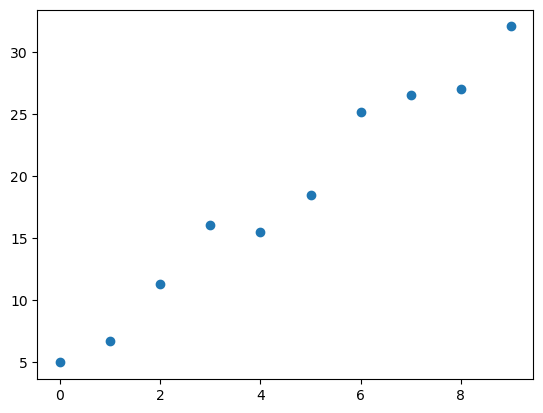

In [6]:
plt.scatter(x1,Y)

In [7]:
w = np.random.randn(7).reshape(7,1)

array([[-2.58941984],
       [-0.69286312],
       [ 0.37384259],
       [ 1.311226  ],
       [ 0.76538306],
       [ 2.1757611 ],
       [-0.96179968]])

In [49]:
w = np.random.randn(7).reshape(7,1)
alpha = 0.001 # learning rate
lam = 0.01
best_mse,best_r2,best_w = 1e6,0,w

iter = []
cost1 = []
cost2 = []
m = 0

No. of iterations:  20000 , Theta values:  [[  2.24820606]
 [  3.31183254]
 [  5.62876162]
 [  9.30233225]
 [ 13.7863432 ]
 [ 13.81199002]
 [-14.38907141]] ,  MSE =  5.9818312722419575 , R2 =  0.850937211043715


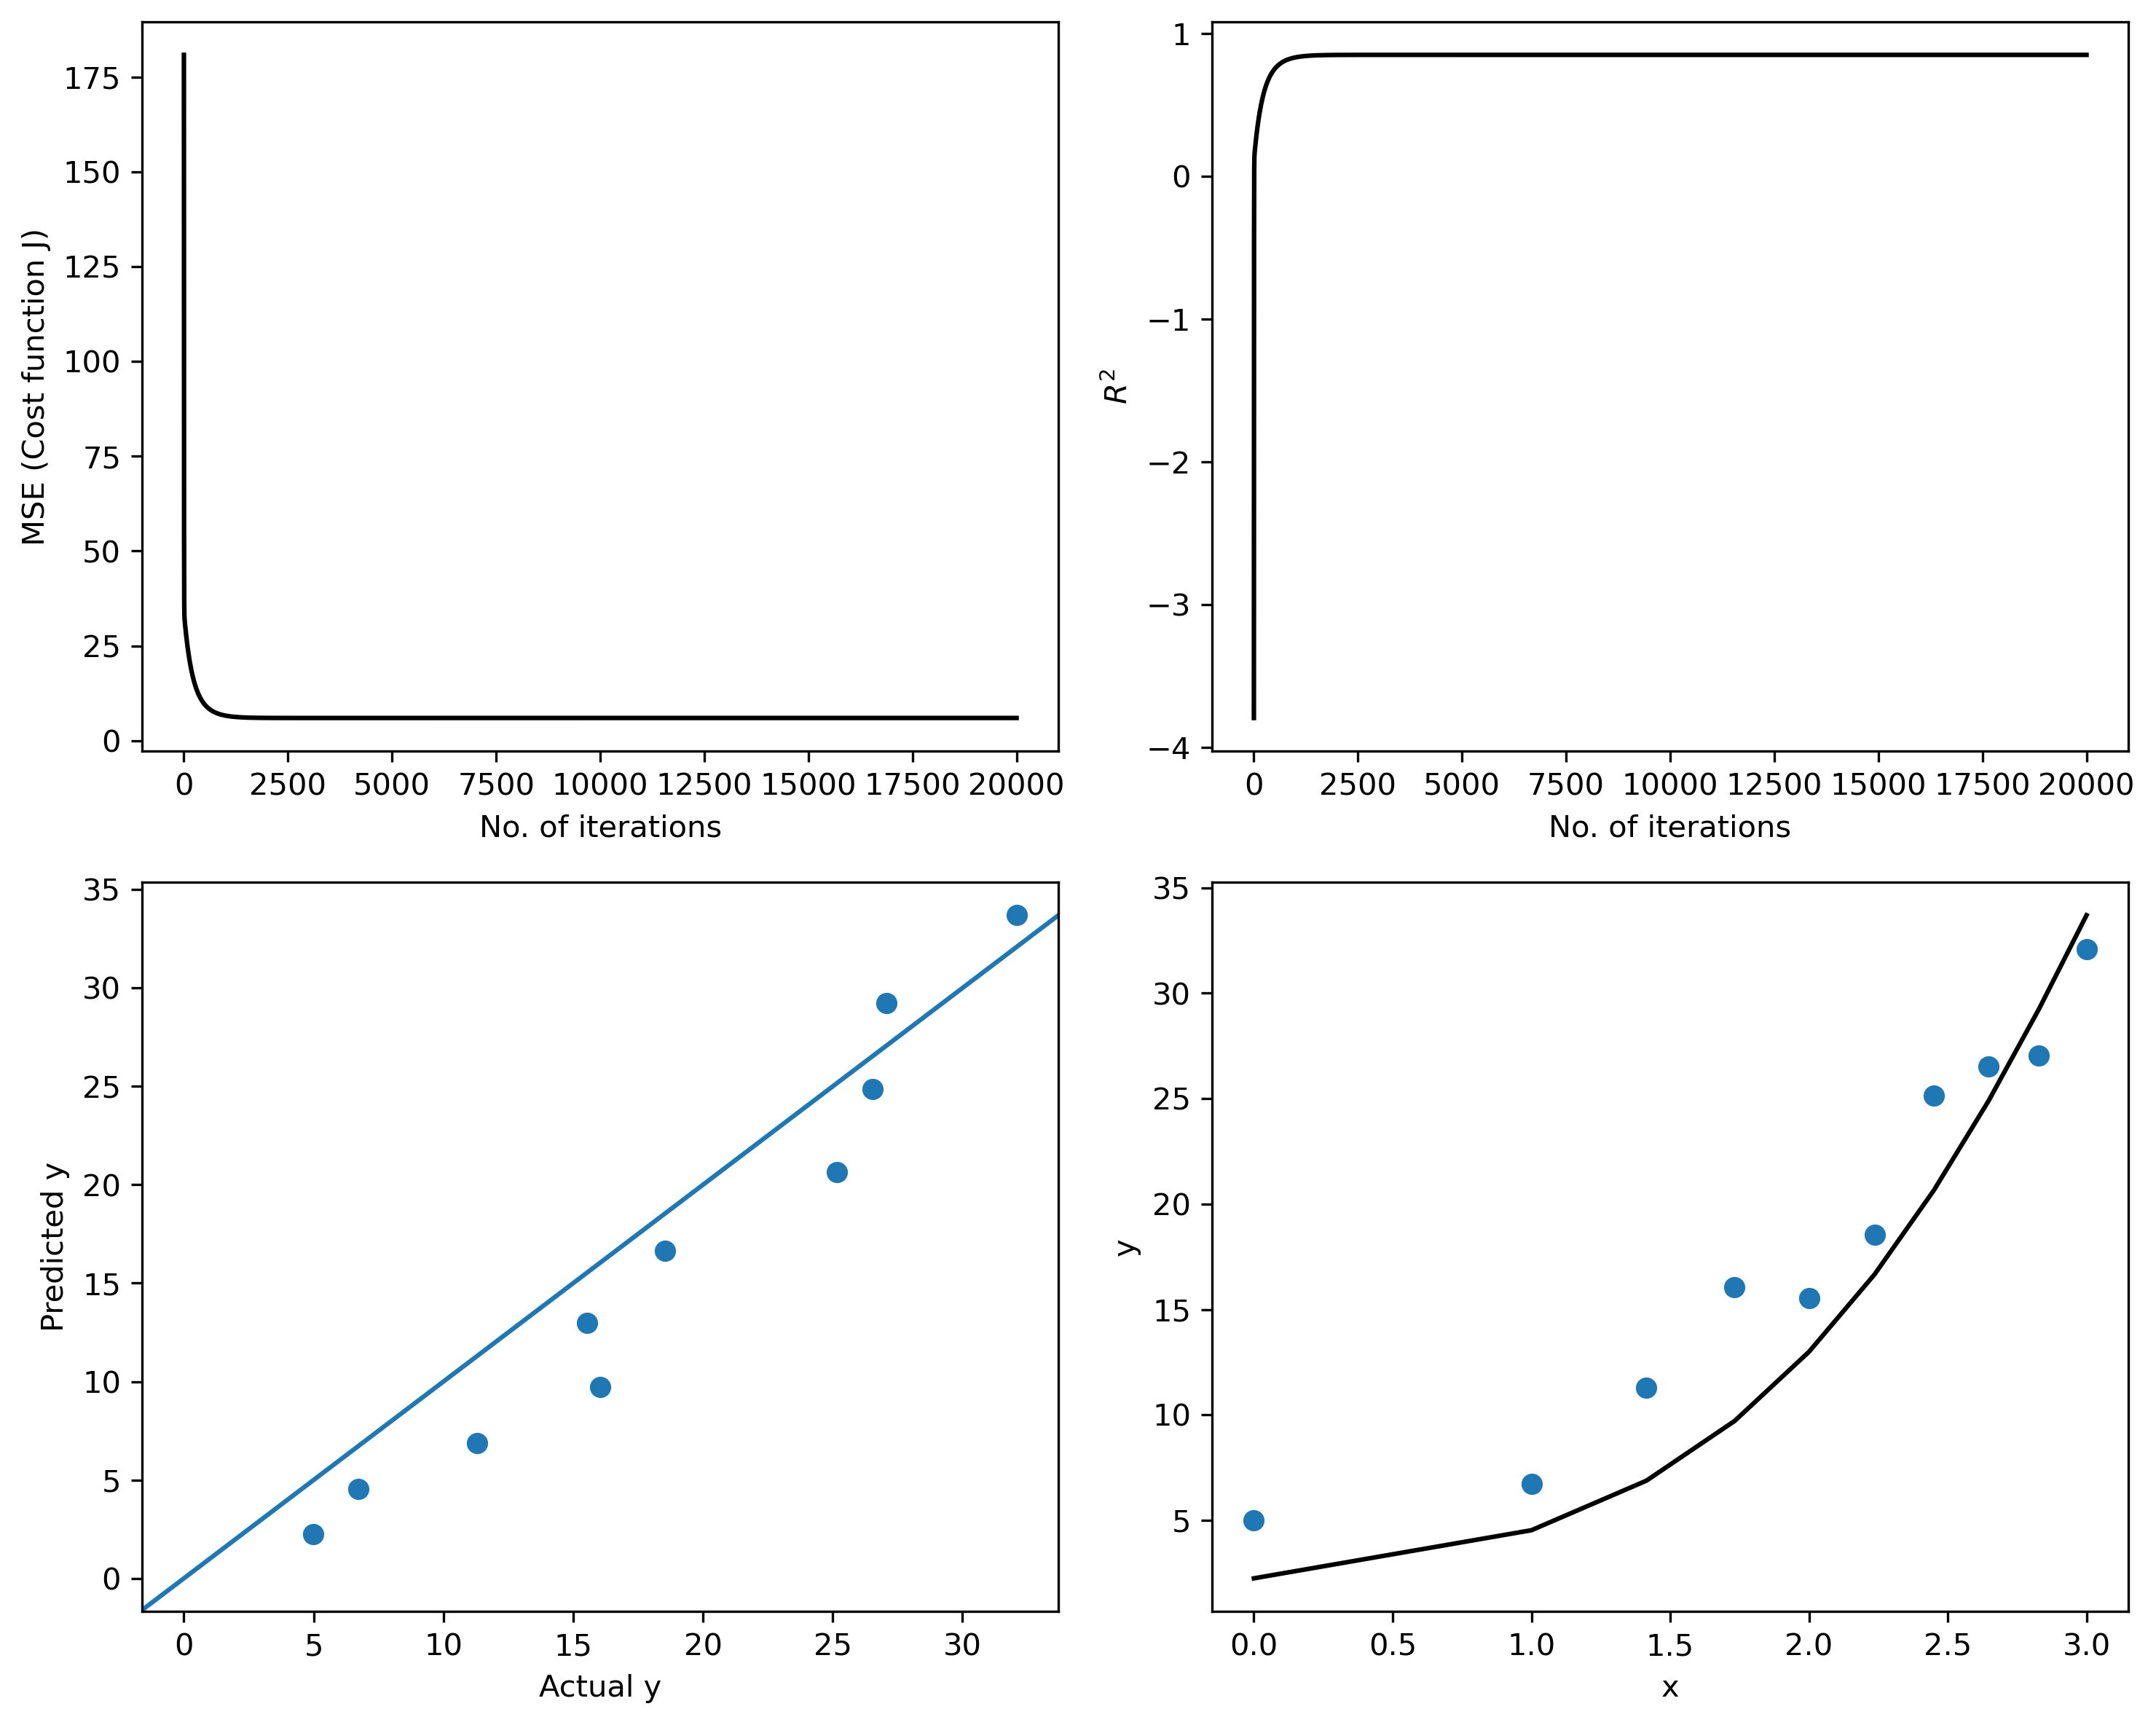

In [50]:
for i in range(20000):
    H = X@w
    mse = (np.sum((H-Y)**2)+lam*np.sum(w[1:,:]**2))/(2*H.shape[0])
    r2=1-np.sum((Y-H)**2)/np.sum((Y-np.mean(Y))**2)

    if mse<best_mse:
        best_mse = mse
        best_r2 = r2
        best_w = w

    w[0,0] = w[0,0]*(1-lam/len(H)) - alpha*(1/len(H))*np.sum(H-Y)
    w[1,0] = w[1,0]*(1-lam/len(H)) - alpha*(1/len(H))*np.sum((H-Y)*x1)
    w[2,0] = w[2,0]*(1-lam/len(H)) - alpha*(1/len(H))*np.sum((H-Y)*x2)
    w[3,0] = w[3,0]*(1-lam/len(H)) - alpha*(1/len(H))*np.sum((H-Y)*x3)
    w[4,0] = w[4,0]*(1-lam/len(H)) - alpha*(1/len(H))*np.sum((H-Y)*x4)
    w[5,0] = w[5,0]*(1-lam/len(H)) - alpha*(1/len(H))*np.sum((H-Y)*x5)
    w[6,0] = w[6,0]*(1-lam/len(H)) - alpha*(1/len(H))*np.sum((H-Y)*x6)

    m += 1
    iter.append(m)
    cost1.append(mse)
    cost2.append(r2)

w = best_w
fig = plt.figure(figsize=(10,8),dpi=300)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(iter,cost1,'k-',label='MSE')
ax2.plot(iter,cost2,'k-',label=f'$R^2$')
ax3.scatter(Y,H)
ax3.axline([0, 0], [1, 1])
ax4.scatter(x1,Y)
ax4.plot(x1,(w[0,0]+w[1,0]*x1/(np.max(x1)-np.min(x1))+w[2,0]*x2/(np.max(x2)-np.min(x2))+w[3,0]*x3/(np.max(x3)-np.min(x3))+w[4,0]*x4/(np.max(x4)-np.min(x4))+w[5,0]*x5/(np.max(x5)-np.min(x5))+w[6,0]*x6/(np.max(x6)-np.min(x6))),'k-')
# ax4.text(4,10,f'y={w[1,0]:.3f}x+{w[0,0]:.3f}, $R^2$={r2:.4f}')

ax1.set_xlabel('No. of iterations')
ax1.set_ylabel('MSE (Cost function J)')
ax2.set_xlabel('No. of iterations')
ax2.set_ylabel(f'$R^2$')
ax3.set_xlabel('Actual y')
ax3.set_ylabel('Predicted y')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
plt.tight_layout()

print('No. of iterations: ', m,',', 'Theta values: ',w,', ','MSE = ',mse,',', 'R2 = ',r2)



Theta values:  [[17.7786123 ]
 [ 0.22912573]
 [ 0.25902553]
 [ 0.26252641]
 [ 0.25641036]
 [ 0.24711637]
 [ 0.23716844]] ,  MSE:  1616.1521615944353 ,  R2 value:  0.10140273289337487


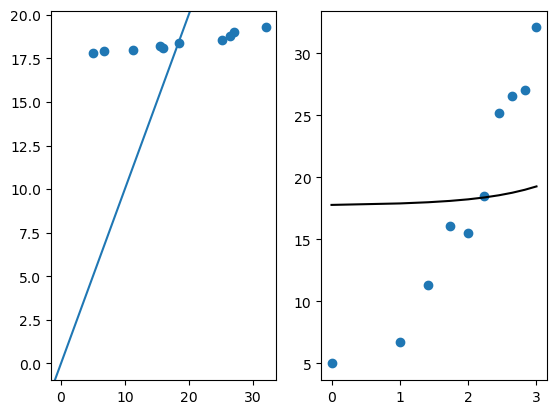

In [61]:
idm = np.identity(7)
idm[0,0] = 0
lam = 100
w=np.linalg.inv(X.T@X+lam*idm)@(X.T)@Y
H1 = X@w
mse1 = (np.sum((H1-Y)**2)+lam*np.sum(w**2))/(2*H.shape[0])
r21=1-np.sum((Y-H1)**2)/np.sum((Y-np.mean(Y))**2)
print('Theta values: ',w,', ','MSE: ',mse1,', ','R2 value: ',r21)

fig,(ax3,ax4) = plt.subplots(1,2)
ax3.scatter(Y,H1)
ax3.axline([0, 0], [1, 1])
ax4.scatter(x1,Y)
ax4.plot(x1,(w[0,0]+w[1,0]*x1/(np.max(x1)-np.min(x1))+w[2,0]*x2/(np.max(x2)-np.min(x2))+w[3,0]*x3/(np.max(x3)-np.min(x3))+w[4,0]*x4/(np.max(x4)-np.min(x4))+w[5,0]*x5/(np.max(x5)-np.min(x5))+w[6,0]*x6/(np.max(x6)-np.min(x6))),'k-')
plt.show()

In [81]:
w = np.zeros(7).reshape(7,1)
w[0,0]=lr.intercept_
for i in range(1,7):
    w[i,0] = lr.coef_[0,i-1]
w

array([[ 4.99642993e+00],
       [ 0.00000000e+00],
       [-6.01785544e+02],
       [ 4.84856656e+03],
       [-1.48404603e+04],
       [ 2.20708515e+04],
       [-1.59327066e+04]])

In [80]:
lr.coef_[0,5]

-15932.706630725765

0.9811308827379165 1.397285409965957


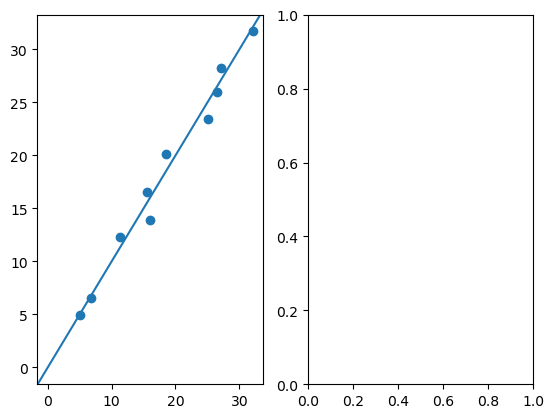

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr = LinearRegression()
lr.fit(X,Y)
H = lr.predict(X)
r2 = r2_score(H,Y)
mse = mean_squared_error(H,Y)
print(r2,mse)

w = np.zeros(7).reshape(7,1)
w[0,0]=lr.intercept_
for i in range(1,7):
    w[i,0] = lr.coef_[0,i-1]

fig,(ax3,ax4) = plt.subplots(1,2)
ax3.scatter(Y,H)
ax3.axline([0, 0], [1, 1])
# ax4.scatter(x1,Y)
# ax4.plot(x1,(w[0,0]+w[1,0]*x1_norm+w[2,0]*x2_norm+w[3,0]*x3_norm+w[4,0]*x4_norm+w[5,0]*x5_norm+w[6,0]*x6_norm),'k-')
plt.show()

0.9374188630960821 3.7668294914932994


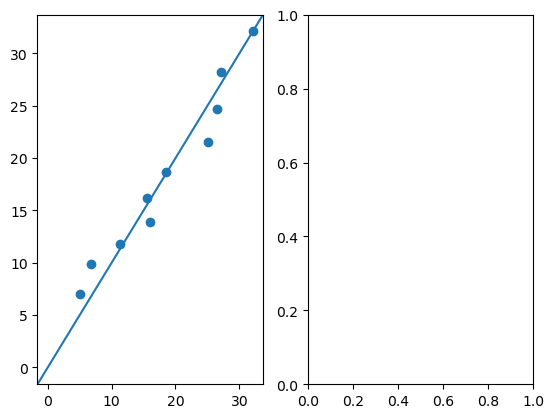

In [104]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X,Y)
H = ridge_model.predict(X)
r2 = r2_score(H,Y)
mse = mean_squared_error(H,Y)
print(r2,mse)

w = np.zeros(7).reshape(7,1)
w[0,0]=lr.intercept_
for i in range(1,7):
    w[i,0] = lr.coef_[0,i-1]

fig,(ax3,ax4) = plt.subplots(1,2)
ax3.scatter(Y,H)
ax3.axline([0, 0], [1, 1])
# ax4.scatter(x1,Y)
# ax4.plot(x1,(w[0,0]+w[1,0]*x1_norm+w[2,0]*x2_norm+w[3,0]*x3_norm+w[4,0]*x4_norm+w[5,0]*x5_norm+w[6,0]*x6_norm),'k-')
plt.show()

0.9117987776751776 4.334841936128678
[[ 4.99642993e+00]
 [ 0.00000000e+00]
 [-6.01785544e+02]
 [ 4.84856656e+03]
 [-1.48404603e+04]
 [ 2.20708515e+04]
 [-1.59327066e+04]]


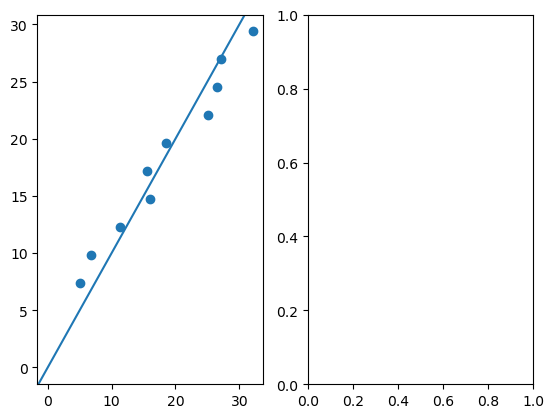

In [103]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error

lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X,Y)
H = lasso_model.predict(X)
r2 = r2_score(H,Y)
mse = mean_squared_error(H,Y)
print(r2,mse)

w = np.zeros(7).reshape(7,1)
w[0,0]=lr.intercept_
for i in range(1,7):
    w[i,0] = lr.coef_[0,i-1]
print(w)
fig,(ax3,ax4) = plt.subplots(1,2)
ax3.scatter(Y,H)
ax3.axline([0, 0], [1, 1])
# ax4.scatter(x1,Y)
# ax4.plot(x1,(w[0,0]+w[1,0]*x1_norm+w[2,0]*x2_norm+w[3,0]*x3_norm+w[4,0]*x4_norm+w[5,0]*x5_norm+w[6,0]*x6_norm),'k-')
plt.show()

/var/folders/tm/lml2dr_d2y14c8k5z7_kvnvc0000gn/T/ipykernel_38353/1977784251.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  net_model.fit(X,Y)
/Users/tang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/tang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.016e+00, tolerance: 7.545e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.en

0.9754880183926697 1.803197671258517


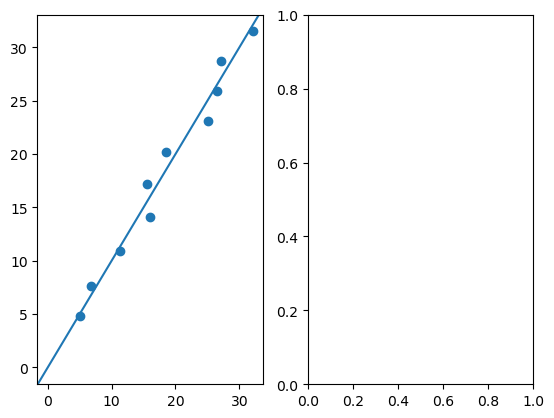

In [102]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error

net_model = ElasticNet(alpha=0)
net_model.fit(X,Y)
H = net_model.predict(X)
r2 = r2_score(H,Y)
mse = mean_squared_error(H,Y)
print(r2,mse)

w = np.zeros(7).reshape(7,1)
w[0,0]=lr.intercept_
for i in range(1,7):
    w[i,0] = lr.coef_[0,i-1]

fig,(ax3,ax4) = plt.subplots(1,2)
ax3.scatter(Y,H)
ax3.axline([0, 0], [1, 1])
# ax4.scatter(x1,Y)
# ax4.plot(x1,(w[0,0]+w[1,0]*x1_norm+w[2,0]*x2_norm+w[3,0]*x3_norm+w[4,0]*x4_norm+w[5,0]*x5_norm+w[6,0]*x6_norm),'k-')
plt.show()

0.9852442247876151 0.9932475524974897


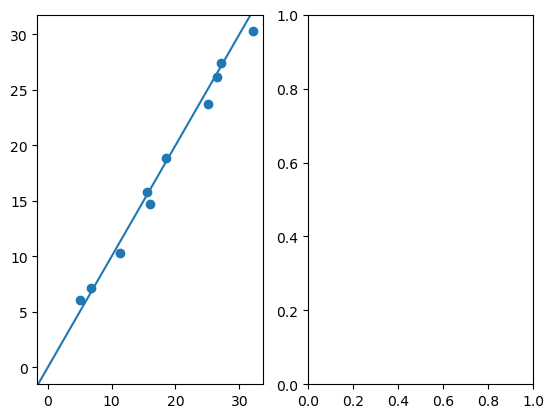

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

rf_model = RandomForestRegressor(n_estimators=1000)
rf_model.fit(X,np.ravel(Y))
H = rf_model.predict(X)
r2 = r2_score(H,Y)
mse = mean_squared_error(H,Y)
print(r2,mse)

w = np.zeros(7).reshape(7,1)
w[0,0]=lr.intercept_
for i in range(1,7):
    w[i,0] = lr.coef_[0,i-1]

fig,(ax3,ax4) = plt.subplots(1,2)
ax3.scatter(Y,H)
ax3.axline([0, 0], [1, 1])
# ax4.scatter(x1,Y)
# ax4.plot(x1,(w[0,0]+w[1,0]*x1_norm+w[2,0]*x2_norm+w[3,0]*x3_norm+w[4,0]*x4_norm+w[5,0]*x5_norm+w[6,0]*x6_norm),'k-')
plt.show()

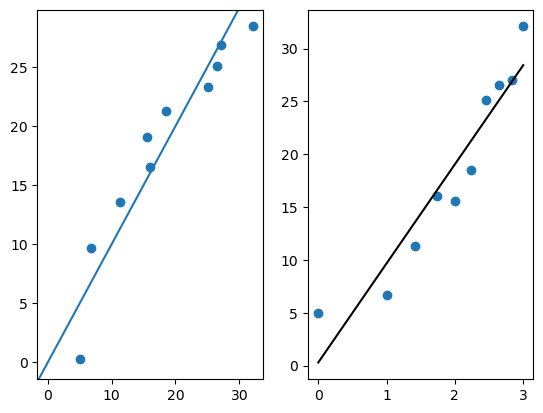

In [84]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x1,Y)
H = lr.predict(x1)

w = np.zeros(2).reshape(2,1)
w[0,0]=lr.intercept_
for i in range(1,2):
    w[i,0] = lr.coef_[0,i-1]

fig,(ax3,ax4) = plt.subplots(1,2)
ax3.scatter(Y,H)
ax3.axline([0, 0], [1, 1])
ax4.scatter(x1,Y)
ax4.plot(x1,(w[0,0]+w[1,0]*x1),'k-')
plt.show()

Theta values:  [[4.95822557]
 [2.98619926]] ,  MSE:  9.315494938031147 ,  R2 value:  0.975078487642446


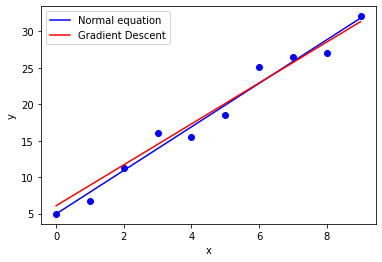

In [11]:
# Normal equation

w1=np.linalg.inv(X.T@X)@(X.T)@Y
H1=X@w1
mse1 = (np.sum((H1-Y)**2)+lam*np.sum(w1**2))/(2*H.shape[0])
r21=1-np.sum((Y-H1)**2)/np.sum((Y-np.mean(Y))**2)
print('Theta values: ',w1,', ','MSE: ',mse1,', ','R2 value: ',r21)
plt.scatter(x1,Y,color='b')
plt.plot(x1,(w1[0,0]+w1[1,0]*x1),'b-',label='Normal equation')
plt.plot(x1,(w[0,0]+w[1,0]*x1),'r-',label='Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
#plt.axline([0, 0], [1, 1])

In [43]:
w1

array([[4.95822557],
       [2.98619926]])